<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-simplest-setting" data-toc-modified-id="The-simplest-setting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The simplest setting</a></span><ul class="toc-item"><li><span><a href="#Checking-the-split-quality" data-toc-modified-id="Checking-the-split-quality-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Checking the split quality</a></span></li></ul></li><li><span><a href="#Higher-depth" data-toc-modified-id="Higher-depth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Higher depth</a></span></li><li><span><a href="#What-if-we-train-the-bechmark-with-the-most-recent-data?" data-toc-modified-id="What-if-we-train-the-bechmark-with-the-most-recent-data?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>What if we train the bechmark with the most recent data?</a></span></li><li><span><a href="#What-if-t=1-and-t=2-are-inverted?" data-toc-modified-id="What-if-t=1-and-t=2-are-inverted?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>What if t=1 and t=2 are inverted?</a></span></li><li><span><a href="#Looking-to-different-mixes-of-weights-for-t=1-and-t=2" data-toc-modified-id="Looking-to-different-mixes-of-weights-for-t=1-and-t=2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Looking to different mixes of weights for t=1 and t=2</a></span><ul class="toc-item"><li><span><a href="#Using-6-for-t1-and-4-fot-t2-to-show-that-in-some-cases-they-eventually-converge" data-toc-modified-id="Using-6-for-t1-and-4-fot-t2-to-show-that-in-some-cases-they-eventually-converge-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Using 6 for t1 and 4 fot t2 to show that in some cases they eventually converge</a></span></li><li><span><a href="#Averaging-multiple-scenarios" data-toc-modified-id="Averaging-multiple-scenarios-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Averaging multiple scenarios</a></span></li></ul></li></ul></div>

# Motivating example for Time Robust Tree

## The simplest setting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
import pandas as pd
import warnings
import pdb

from time_robust_forest.models import TimeForestClassifier, TimeForestRegressor
from models.time_robust_forest import RandomTimeSplitTree
from models.decision_tree import DecisionTree
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr
from matplotlib import pyplot

warnings.filterwarnings('ignore')

In [2]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rcParams['figure.figsize'] = (12, 4)
    

In [3]:
set_style()

First period data. A function to generate this data is only used later in notebook to decouple it from the image creation.

In [4]:
w = 1
period = [1, 1, 1, 1, 1, 1] * w
y_t_1 = np.array([0, 0, 0, 1, 1, 1] * w)
x_1 = np.array([3, 4, 6, 3, 5, 6] * w)
x_2 = np.array([1, 1, 1, 2, 2, 2] * w)

t_1 = pd.DataFrame(np.array([x_1, x_2, period]).transpose(), columns=["x_1", "x_2", "period"])

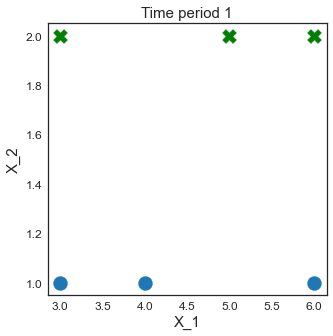

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
## Negative
mask = (y_t_1 == 0)
ax.scatter(x_1[mask], x_2[mask], s=200)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.title("Time period 1", fontsize=15)
    
## Positive cases
mask = (y_t_1 == 1)
ax.scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)
plt.xlabel("X_1", fontsize=15)
plt.ylabel("X_2", fontsize=15)
plt.show()

Second period data

In [6]:
w = 1
period = [2, 2, 2, 2, 2, 2] * w
y_t_2 = np.array([0, 0, 0, 1, 1, 1] * w)
x_1 = np.array([3, 4, 5, 4, 5, 6] * w)
x_2 = np.array([1, 1, 2, 2, 1, 1] * w)

t_2 = pd.DataFrame(np.array([x_1, x_2, period]).transpose(), columns=["x_1", "x_2", "period"])

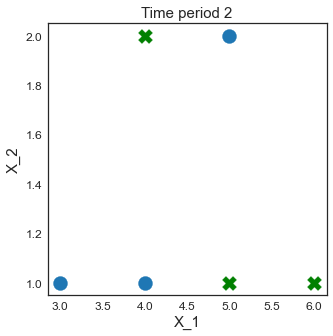

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

## Negative
mask = (y_t_2 == 0)
ax.scatter(x_1[mask], x_2[mask], s=200)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.title("Time period 2", fontsize=15)
    
## Positive cases
mask = (y_t_2 == 1)
ax.scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)
plt.xlabel("X_1", fontsize=15)
plt.ylabel("X_2", fontsize=15)
plt.show()

Third period, the holdout.

In [8]:
w = 1
period = [3, 3, 3, 3, 3, 3] * w

y_t_3 = np.array([0, 0, 1, 1, 0, 1] * w)
x_1 = np.array([3, 4, 3, 5, 6, 6] * w)
x_2 = np.array([2, 2, 1, 2, 1, 2] * w)

holdout = pd.DataFrame(np.array([x_1, x_2, period]).transpose(), columns=["x_1", "x_2", "period"])

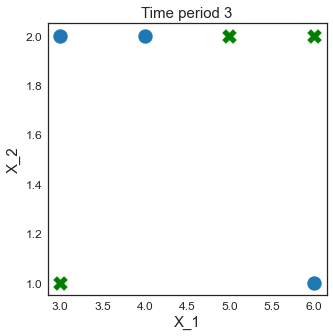

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

## Negative
mask = (y_t_3 == 0)
ax.scatter(x_1[mask], x_2[mask], s=200)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.title("Time period 3", fontsize=15)
    
## Positive cases
mask = (y_t_3 == 1)
ax.scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)
plt.xlabel("X_1", fontsize=15)
plt.ylabel("X_2", fontsize=15)
plt.show()

Make a single frame for the data.

In [10]:
y = np.hstack((y_t_1, y_t_2))
train = pd.concat([t_1, t_2]).reset_index(drop=True)

Make a single image for the paper.

[]

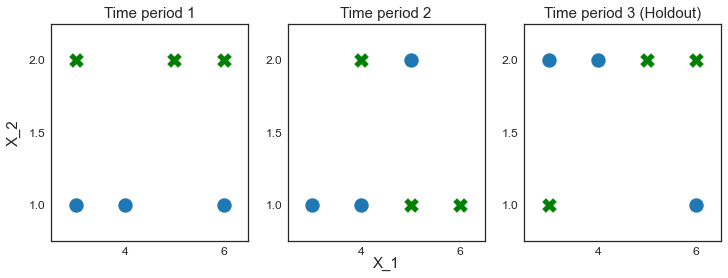

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3)
x_1 = t_1["x_1"].values
x_2 = t_1["x_2"].values

## Negative
mask = (y_t_1 == 0)
axs[0].scatter(x_1[mask], x_2[mask], s=200)
#ax.scatter(x_1, x_2)

axs[0].xaxis.set_tick_params(labelsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].set_title("Time period 1", fontsize=15)

    
## Positive cases
mask = (y_t_1 == 1)
axs[0].scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)

xmin, xmax, ymin, ymax = axs[0].axis()
ymax += 0.2
ymin -= 0.2

axs[0].set_ylim([ymin, ymax])
axs[0].set_xlim([2.5, 6.5])

### T2
x_1 = t_2["x_1"].values
x_2 = t_2["x_2"].values

## Negative
mask = (y_t_2 == 0)
axs[1].scatter(x_1[mask], x_2[mask], s=200)
axs[1].xaxis.set_tick_params(labelsize=12)
axs[1].yaxis.set_tick_params(labelsize=12)
axs[1].set_ylim([ymin, ymax])
axs[1].set_xlim([2.5, 6.5])
axs[1].set_title("Time period 2", fontsize=15)
    
## Positive cases
mask = (y_t_2 == 1)
axs[1].scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)

### T3
x_1 = holdout["x_1"].values
x_2 = holdout["x_2"].values

## Negative
mask = (y_t_3 == 0)
axs[2].scatter(x_1[mask], x_2[mask], s=200)
axs[2].xaxis.set_tick_params(labelsize=12)
axs[2].yaxis.set_tick_params(labelsize=12)
axs[2].set_ylim([ymin, ymax])
axs[2].set_xlim([2.5, 6.5])
axs[2].set_title("Time period 3 (Holdout)", fontsize=15)
    
## Positive cases
mask = (y_t_3 == 1)
axs[2].scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)

axs[0].locator_params(axis='y', nbins=4)
axs[0].locator_params(axis='x', nbins=2)

axs[1].locator_params(axis='y', nbins=4)
axs[1].locator_params(axis='x', nbins=2)

axs[2].locator_params(axis='y', nbins=4)
axs[2].locator_params(axis='x', nbins=2)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("X_1", fontsize=15)
plt.ylabel("X_2", fontsize=15)

plt.savefig('../images/motivating_example.eps', format='eps')

plt.plot()

Split illustration:

[]

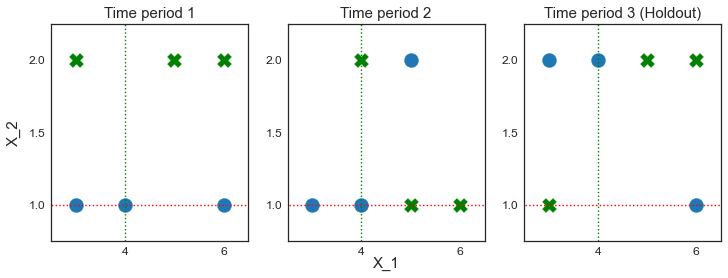

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3)
x_1 = t_1["x_1"].values
x_2 = t_1["x_2"].values

## Negative
mask = (y_t_1 == 0)
axs[0].scatter(x_1[mask], x_2[mask], s=200)
#ax.scatter(x_1, x_2)

axs[0].xaxis.set_tick_params(labelsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].set_title("Time period 1", fontsize=15)

    
## Positive cases
mask = (y_t_1 == 1)
axs[0].scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)

xmin, xmax, ymin, ymax = axs[0].axis()
ymax += 0.2
ymin -= 0.2

axs[0].set_ylim([ymin, ymax])
axs[0].set_xlim([2.5, 6.5])

axs[0].hlines(1, xmin-0.5, xmax+0.5, linestyle="dotted", color="red")
axs[0].vlines(4, ymin, ymax, linestyle="dotted", color="green")

### T2
x_1 = t_2["x_1"].values
x_2 = t_2["x_2"].values

## Negative
mask = (y_t_2 == 0)
axs[1].scatter(x_1[mask], x_2[mask], s=200)
axs[1].xaxis.set_tick_params(labelsize=12)
axs[1].yaxis.set_tick_params(labelsize=12)
axs[1].set_ylim([ymin, ymax])
axs[1].set_xlim([2.5, 6.5])
axs[1].set_title("Time period 2", fontsize=15)

    
## Positive cases
mask = (y_t_2 == 1)
axs[1].scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)

xmin, xmax, ymin, ymax = axs[1].axis()
axs[1].hlines(1, xmin-0.5, xmax+0.5, linestyle="dotted", color="red")
axs[1].vlines(4, ymin, ymax, linestyle="dotted", color="green")

### T3
x_1 = holdout["x_1"].values
x_2 = holdout["x_2"].values

## Negative
mask = (y_t_3 == 0)
axs[2].scatter(x_1[mask], x_2[mask], s=200)
axs[2].xaxis.set_tick_params(labelsize=12)
axs[2].yaxis.set_tick_params(labelsize=12)
axs[2].set_ylim([ymin, ymax])
axs[2].set_xlim([2.5, 6.5])
axs[2].set_title("Time period 3 (Holdout)", fontsize=15)
    
## Positive cases
mask = (y_t_3 == 1)
axs[2].scatter(x_1[mask], x_2[mask], color="g", marker="X", s=200)

axs[0].locator_params(axis='y', nbins=4)
axs[0].locator_params(axis='x', nbins=2)

axs[1].locator_params(axis='y', nbins=4)
axs[1].locator_params(axis='x', nbins=2)

axs[2].locator_params(axis='y', nbins=4)
axs[2].locator_params(axis='x', nbins=2)

xmin, xmax, ymin, ymax = axs[2].axis()
axs[2].hlines(1, xmin-0.5, xmax+0.5, linestyle="dotted", color="red")
axs[2].vlines(4, ymin, ymax, linestyle="dotted", color="green")
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("X_1", fontsize=15)
plt.ylabel("X_2", fontsize=15)

plt.savefig('../images/motivating_example_split.eps', format='eps')

plt.plot()

Train the benchmark:

In [13]:
model = DecisionTree(train[["x_1", "x_2"]], y, max_depth=0,
                     min_leaf=1)
train["prediction"] = model.predict(train)

print("Splits used: {}".format(model.feature_importance.sum()))
print(model.feature_importance)

holdout["prediction"] = model.predict(holdout)
print("Train performance: {}".format(roc_auc_score(y, train["prediction"])))
print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["prediction"])))

Splits used: 1
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 0.75
Holdout performance: 0.5


The RandomTimeSplitTree when used without bootstrapping and `max_feature` parameter equals to `1.0` (use 100% of the available features) is equivalent to the Time Robust Tree.

The model from the package:

In [14]:
time_model_tree = TimeForestClassifier(time_column="period",
                                        n_estimators=1,
                                        max_depth=1,
                                        min_leaf=1,
                                        min_sample_periods=1,
                                        bootstrapping=False,
                                        max_features=1.0,
                                        period_criterion="max")

time_model_tree.fit(train[["x_1", "x_2", "period"]], y)
train["time_prediction"] = time_model_tree.predict_proba(train)[:, 1]

holdout["time_prediction"] = time_model_tree.predict_proba(holdout)[:, 1]
print("Train performance: {}".format(roc_auc_score(y, train["time_prediction"])))
print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["time_prediction"])))

Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667


In [15]:
time_model_tree.feature_importance()

x_1    1
Name: Feature Importance, dtype: int64

In [16]:
time_model_tree = RandomTimeSplitTree(train[["x_1", "x_2", "period"]], 
                                        y,
                                        time_column="period",
                                        max_depth=0,
                                        min_sample_periods=1,
                                        min_leaf=2,
                                        verbose=True,
                                        split_verbose=False,
                                        bootstrapping=False,
                                        max_features=1.0,
                                        period_criterion="max")

train["time_prediction"] = time_model_tree.predict(train)

print("Splits used: {}".format(time_model_tree.feature_importance.sum()))
print(time_model_tree.feature_importance)

holdout["time_prediction"] = time_model_tree.predict(holdout)
print("Train performance: {}".format(roc_auc_score(y, train["time_prediction"])))
print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["time_prediction"])))

Depth: 0
Max Depth: 0
Node periods distribution
1    6
2    6
Name: period, dtype: int64
Depth: 1
Max Depth: 0
Node periods distribution
1    3
2    3
Name: period, dtype: int64
Depth: 1
Max Depth: 0
Node periods distribution
1    3
2    3
Name: period, dtype: int64
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667


### Checking the split quality

In [17]:
time_tree_model = RandomTimeSplitTree(train[["x_1", "x_2", "period"]], 
                                        y,
                                        time_column="period",
                                        max_depth=10,
                                        min_leaf=1,
                                        min_sample_periods=1,
                                        verbose=True,
                                        split_verbose=True,
                                        bootstrapping=False,
                                        max_features=1.0,
                                        period_criterion="max")

time_tree_model.feature_importance

Depth: 0
Max Depth: 10
Node periods distribution
1    6
2    6
Name: period, dtype: int64
Evaluate a split on variable x_1 at value 3
Score gini by period: [0.5, 0.4]
Evaluate a split on variable x_1 at value 4
Score gini by period: [0.4444444444444444, 0.4444444444444444]
Evaluate a split on variable x_1 at value 5
Score gini by period: [0.5, 0.4]
Evaluate a split on variable x_2 at value 1
Score gini by period: [0.0, 0.5]
Depth: 1
Max Depth: 10
Node periods distribution
1    3
2    3
Name: period, dtype: int64
Depth: 1
Max Depth: 10
Node periods distribution
1    3
2    3
Name: period, dtype: int64


x_1    1
Name: Feature Importance, dtype: int64

Modify the data by making the whole training belong to a single period in time to check split quality on pooled scenario. 

In [18]:
modified_train = train.copy(deep=True)
modified_train["period"] = 1

In [19]:
modified_train

,x_1,x_2,period,prediction,time_prediction
0,3,1,1,0.285714,0.333333
1,4,1,1,0.285714,0.333333
2,6,1,1,0.285714,0.666667
3,3,2,1,0.800000,0.333333
4,5,2,1,0.800000,0.666667
5,6,2,1,0.800000,0.666667
6,3,1,1,0.285714,0.333333
7,4,1,1,0.285714,0.333333
8,5,2,1,0.800000,0.666667
9,4,2,1,0.800000,0.333333


In [20]:
model = RandomTimeSplitTree(modified_train[["x_1", "x_2", "period"]], 
                    y,
                    time_column="period",
                    max_depth=10,
                    min_sample_periods=1,
                    min_leaf=1,   
                    split_verbose=True,
                    verbose=True,
                    max_features=1.0,
                    bootstrapping=False,
                    criterion="gini",
                    period_criterion="max")

model.feature_importance

Depth: 0
Max Depth: 10
Node periods distribution
1    12
Name: period, dtype: int64
Evaluate a split on variable x_1 at value 3
Score gini by period: [0.48148148148148145]
Evaluate a split on variable x_1 at value 4
Score gini by period: [0.4444444444444444]
Evaluate a split on variable x_1 at value 5
Score gini by period: [0.48148148148148145]
Evaluate a split on variable x_2 at value 1
Score gini by period: [0.3714285714285714]
Depth: 1
Max Depth: 10
Node periods distribution
1    7
Name: period, dtype: int64
Depth: 1
Max Depth: 10
Node periods distribution
1    5
Name: period, dtype: int64


x_2    1
Name: Feature Importance, dtype: int64

In [21]:
model = RandomTimeSplitTree(modified_train[["x_1", "x_2", "period"]], 
                    y,
                    time_column="period",
                    max_depth=20,
                    min_sample_periods=1,
                    min_leaf=1,   
                    split_verbose=True,
                    verbose=False,
                    max_features=1.0,
                    bootstrapping=False,
                    criterion="gini",
                    period_criterion="avg")

model.feature_importance

Evaluate a split on variable x_1 at value 3
Score gini by period: [0.48148148148148145]
Evaluate a split on variable x_1 at value 4
Score gini by period: [0.4444444444444444]
Evaluate a split on variable x_1 at value 5
Score gini by period: [0.48148148148148145]
Evaluate a split on variable x_2 at value 1
Score gini by period: [0.3714285714285714]


x_2    1
Name: Feature Importance, dtype: int64

## Higher depth

In [22]:
def generate_motivational_data(t1_w, t2_w, holdout_w=1):
    """
    t1_w, t2_w: the weights of the examples in t1 and t2
    """
    
    period = [1, 1, 1, 1, 1, 1] * t1_w
    y_t_1 = np.array([0, 0, 0, 1, 1, 1] * t1_w)
    x_1 = np.array([3, 4, 6, 3, 5, 6] * t1_w)
    x_2 = np.array([1, 1, 1, 2, 2, 2] * t1_w)

    t_1 = pd.DataFrame(np.array([x_1, x_2, period]).transpose(), columns=["x_1", "x_2", "period"])
    
    period = [2, 2, 2, 2, 2, 2] * t2_w
    y_t_2 = np.array([0, 0, 0, 1, 1, 1] * t2_w)
    x_1 = np.array([3, 4, 5, 4, 5, 6] * t2_w)
    x_2 = np.array([1, 1, 2, 2, 1, 1] * t2_w)

    t_2 = pd.DataFrame(np.array([x_1, x_2, period]).transpose(), columns=["x_1", "x_2", "period"])
        
    ### Holdout
    period = [3, 3, 3, 3, 3, 3] * holdout_w
    y_t_3 = np.array([0, 0, 1, 1, 0, 1] * holdout_w)
    x_1 = np.array([3, 4, 3, 5, 6, 6] * holdout_w)
    x_2 = np.array([2, 2, 1, 2, 1, 2] * holdout_w)
    
    holdout = pd.DataFrame(np.array([x_1, x_2, period]).transpose(), columns=["x_1", "x_2", "period"])
    y = np.hstack((y_t_1, y_t_2))
    train = pd.concat([t_1, t_2]).reset_index(drop=True)
    
    return train, holdout, y, y_t_3

In [23]:
train, holdout, y, y_t_3 = generate_motivational_data(20, 20, holdout_w=1)

In [24]:
benchmark_train_perfs = []
benchmark_holdout_perfs = []
benchmark_splits = []
min_leafs = list(np.linspace(15, 100, 10, dtype=int))
for min_leaf in min_leafs:
    print("-----------------------")
    print("Min leaf = {}".format(min_leaf))
    model = DecisionTree(train[["x_1", "x_2"]], y, max_depth=20, min_leaf=min_leaf)
    train["prediction"] = model.predict(train)

    n_splits = model.feature_importance.sum()
    benchmark_splits.append(n_splits)
    print("Splits used: {}".format(n_splits))
    print(model.feature_importance)

    holdout["prediction"] = model.predict(holdout)
    benchmark_train_perfs.append(roc_auc_score(y, train["prediction"]))
    print("Train performance: {}".format(roc_auc_score(y, train["prediction"])))
    benchmark_holdout_perfs.append(roc_auc_score(y_t_3, holdout["prediction"]))
    print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["prediction"])))

-----------------------
Min leaf = 15
Splits used: 7
x_1    6
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 0.9444444444444444
Holdout performance: 0.2777777777777778
-----------------------
Min leaf = 24
Splits used: 4
x_1    3
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 0.888888888888889
Holdout performance: 0.11111111111111112
-----------------------
Min leaf = 33
Splits used: 4
x_1    3
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 0.888888888888889
Holdout performance: 0.11111111111111112
-----------------------
Min leaf = 43
Splits used: 2
x_2    1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.8611111111111112
Holdout performance: 0.4444444444444444
-----------------------
Min leaf = 52
Splits used: 2
x_2    1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.8611111111111112
Holdout performance: 0.4444444444444444
-----------------------
Min leaf = 62
Splits used: 1
x_2    

In [25]:
challenger_train_perfs = []
challenger_holdout_perfs = []
challenger_splits = []
for min_leaf in min_leafs:
    print("-----------------------")
    print("Min leaf = {}".format(min_leaf))
    time_model_tree = RandomTimeSplitTree(train[["x_1", "x_2", "period"]], 
                                        y,
                                        time_column="period",
                                        max_depth=20,
                                        min_sample_periods=int(min_leaf/2),
                                        min_leaf=min_leaf,  
                                        verbose=False,
                                        split_verbose=False,
                                        bootstrapping=False,
                                        max_features=1.0,
                                        period_criterion="max")
    train["time_prediction"] = time_model_tree.predict(train)

    n_splits = time_model_tree.feature_importance.sum()
    challenger_splits.append(n_splits)
    print("Splits used: {}".format(n_splits))
    print(time_model_tree.feature_importance)

    holdout["time_prediction"] = time_model_tree.predict(holdout)
    
    challenger_train_perfs.append(roc_auc_score(y, train["time_prediction"]))
    print("Train performance: {}".format(roc_auc_score(y, train["time_prediction"])))
    challenger_holdout_perfs.append(roc_auc_score(y_t_3, holdout["time_prediction"]))
    print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["time_prediction"])))

-----------------------
Min leaf = 15
Splits used: 4
x_2    2
x_1    2
Name: Feature Importance, dtype: int64
Train performance: 0.888888888888889
Holdout performance: 0.11111111111111112
-----------------------
Min leaf = 24
Splits used: 4
x_2    2
x_1    2
Name: Feature Importance, dtype: int64
Train performance: 0.888888888888889
Holdout performance: 0.11111111111111112
-----------------------
Min leaf = 33
Splits used: 4
x_2    2
x_1    2
Name: Feature Importance, dtype: int64
Train performance: 0.888888888888889
Holdout performance: 0.11111111111111112
-----------------------
Min leaf = 43
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 52
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 62
Splits used: 1
x_1    1
Name: Feature Im

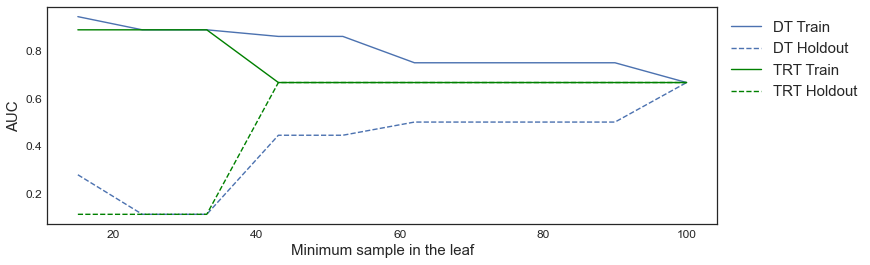

In [26]:
fig, ax = plt.subplots()
plt.plot(min_leafs, benchmark_train_perfs, color="#4c72b0", label="DT Train")
plt.plot(min_leafs, benchmark_holdout_perfs, color="#4c72b0", linestyle="dashed", label="DT Holdout")

plt.plot(min_leafs, challenger_train_perfs, color="green", label="TRT Train")
plt.plot(min_leafs, challenger_holdout_perfs, color="green", linestyle="dashed", label="TRT Holdout")


xmin, xmax, ymin, ymax = plt.axis()

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC", fontsize=15)
#plt.xlabel("Minimum sample in the leaf (DT), minimum sample by period (TRT)", fontsize=15)
plt.xlabel("Minimum sample in the leaf", fontsize=15)
plt.savefig("../images/motivational_deeper.eps", format="eps", bbox_inches="tight")

## What if we train the bechmark with the most recent data?

In [27]:
(train["period"] == 2).values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [28]:
recent_train = train[train["period"] == 2].reset_index()
recent_y = y[(train["period"] == 2).values]

for min_leaf in min_leafs:
    print("-----------------------")
    print("Min leaf = {}".format(min_leaf))
    model = DecisionTree(recent_train[["x_1", "x_2"]], recent_y, max_depth=10, min_leaf=min_leaf)
    recent_train["prediction"] = model.predict(recent_train)

    print("Splits used: {}".format(model.feature_importance.sum()))
    print(model.feature_importance)

    holdout["prediction"] = model.predict(holdout)
    print("Train performance: {}".format(roc_auc_score(recent_y, recent_train["prediction"])))
    print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["prediction"])))

-----------------------
Min leaf = 15
Splits used: 5
x_1    3
x_2    2
Name: Feature Importance, dtype: int64
Train performance: 1.0
Holdout performance: 0.33333333333333337
-----------------------
Min leaf = 24
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 33
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 43
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 52
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 62
Splits used: 1
LEAF    1
Name: Feature Importance, dtype: int64
Train pe

## What if t=1 and t=2 are inverted?

In [29]:
recent_train = train[train["period"] == 1].reset_index()
recent_y = y[(train["period"] == 1).values]

for min_leaf in min_leafs:
    print("-----------------------")
    print("Min leaf = {}".format(min_leaf))
    model = DecisionTree(recent_train[["x_1", "x_2"]], recent_y, max_depth=10, min_leaf=min_leaf)
    recent_train["prediction"] = model.predict(recent_train)

    print("Splits used: {}".format(model.feature_importance.sum()))
    print(model.feature_importance)

    holdout["prediction"] = model.predict(holdout)
    print("Train performance: {}".format(roc_auc_score(recent_y, recent_train["prediction"])))
    print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["prediction"])))

-----------------------
Min leaf = 15
Splits used: 5
x_1    4
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 1.0
Holdout performance: 0.5
-----------------------
Min leaf = 24
Splits used: 1
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 1.0
Holdout performance: 0.5
-----------------------
Min leaf = 33
Splits used: 1
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 1.0
Holdout performance: 0.5
-----------------------
Min leaf = 43
Splits used: 1
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 1.0
Holdout performance: 0.5
-----------------------
Min leaf = 52
Splits used: 1
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 1.0
Holdout performance: 0.5
-----------------------
Min leaf = 62
Splits used: 1
LEAF    1
Name: Feature Importance, dtype: int64
Train performance: 0.5
Holdout performance: 0.5
-----------------------
Min leaf = 71
Splits used: 1
LEAF    1
Name: Feature Importance, dtype: 

## Looking to different mixes of weights for t=1 and t=2

### Using 6 for t1 and 4 fot t2 to show that in some cases they eventually converge

This raises the hypothesis the TRT only regularizes sooner. 

In [30]:
train, holdout, y, y_t_3 = generate_motivational_data(2, 1, holdout_w=1)

In [31]:
benchmark_train_perfs = []
benchmark_holdout_perfs = []
benchmark_splits = []
min_leafs = list(np.linspace(2, 20, 20, dtype=int))
for min_leaf in min_leafs:
    print("-----------------------")
    print("Min leaf = {}".format(min_leaf))
    model = DecisionTree(train[["x_1", "x_2"]], y, max_depth=20, min_leaf=min_leaf)
    train["prediction"] = model.predict(train)

    n_splits = model.feature_importance.sum()
    benchmark_splits.append(n_splits)
    print("Splits used: {}".format(n_splits))
    print(model.feature_importance)

    holdout["prediction"] = model.predict(holdout)
    benchmark_train_perfs.append(roc_auc_score(y, train["prediction"]))
    print("Train performance: {}".format(roc_auc_score(y, train["prediction"])))
    benchmark_holdout_perfs.append(roc_auc_score(y_t_3, holdout["prediction"]))
    print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["prediction"])))

-----------------------
Min leaf = 2
Splits used: 4
x_1    3
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 0.925925925925926
Holdout performance: 0.22222222222222224
-----------------------
Min leaf = 2
Splits used: 4
x_1    3
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 0.925925925925926
Holdout performance: 0.22222222222222224
-----------------------
Min leaf = 3
Splits used: 2
x_2    1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.9074074074074074
Holdout performance: 0.4444444444444444
-----------------------
Min leaf = 4
Splits used: 1
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 0.8333333333333333
Holdout performance: 0.5
-----------------------
Min leaf = 5
Splits used: 1
x_2    1
Name: Feature Importance, dtype: int64
Train performance: 0.8333333333333333
Holdout performance: 0.5
-----------------------
Min leaf = 6
Splits used: 1
x_2    1
Name: Feature Importance, dtype: int64
Train perform

In [32]:
challenger_train_perfs = []
challenger_holdout_perfs = []
challenger_splits = []
for min_leaf in min_leafs:
    print("-----------------------")
    print("Min leaf = {}".format(min_leaf))
    time_model_tree = RandomTimeSplitTree(train[["x_1", "x_2", "period"]], 
                                        y,
                                        time_column="period",
                                        max_depth=20,
                                        min_sample_periods=int(min_leaf/2),
                                        min_leaf=min_leaf,  
                                        verbose=False,
                                        split_verbose=False,
                                        bootstrapping=False,
                                        max_features=1.0,
                                        period_criterion="max")
    train["time_prediction"] = time_model_tree.predict(train)

    n_splits = time_model_tree.feature_importance.sum()
    challenger_splits.append(n_splits)
    print("Splits used: {}".format(n_splits))
    print(time_model_tree.feature_importance)

    holdout["time_prediction"] = time_model_tree.predict(holdout)
    
    challenger_train_perfs.append(roc_auc_score(y, train["time_prediction"]))
    print("Train performance: {}".format(roc_auc_score(y, train["time_prediction"])))
    challenger_holdout_perfs.append(roc_auc_score(y_t_3, holdout["time_prediction"]))
    print("Holdout performance: {}".format(roc_auc_score(y_t_3, holdout["time_prediction"])))

-----------------------
Min leaf = 2
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 2
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 3
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 4
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 5
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train performance: 0.6666666666666667
Holdout performance: 0.6666666666666667
-----------------------
Min leaf = 6
Splits used: 1
x_1    1
Name: Feature Importance, dtype: int64
Train perf

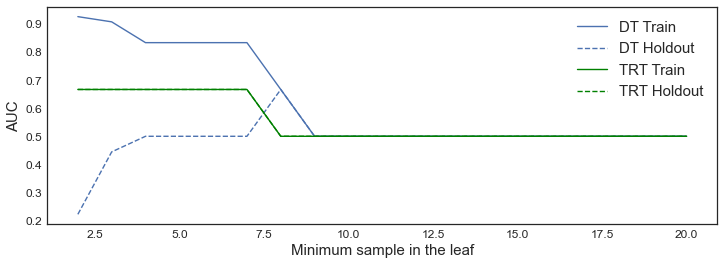

In [33]:
fig, ax = plt.subplots()
plt.plot(min_leafs, benchmark_train_perfs, color="#4c72b0", label="DT Train")
plt.plot(min_leafs, benchmark_holdout_perfs, color="#4c72b0", linestyle="dashed", label="DT Holdout")

plt.plot(min_leafs, challenger_train_perfs, color="green", label="TRT Train")
plt.plot(min_leafs, challenger_holdout_perfs, color="green", linestyle="dashed", label="TRT Holdout")


xmin, xmax, ymin, ymax = plt.axis()

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC", fontsize=15)
#plt.xlabel("Minimum sample in the leaf (DT), minimum sample by period (TRT)", fontsize=15)
plt.xlabel("Minimum sample in the leaf", fontsize=15)
plt.savefig("../images/motivational_deeper_6_4.eps", format="eps", bbox_inches="tight")

### Averaging multiple scenarios

In [34]:
experiment_results = {}
experiment_results["result"] = {"benchmark": [], 
                                "challenger": []}  
n_rounds = 50
min_leafs = list(np.linspace(2, 200, 40, dtype=int))

for n_round in range(n_rounds):
    experiment_results[n_round] = {"benchmark": {}, 
                                   "challenger": {}}    
    weights = np.random.randint(1, 30, 2)
    train, holdout, y, y_t_3 = generate_motivational_data(weights[0],
                               weights[1])

    

    for model_type in ["benchmark", "challenger"]:
        #experiment_results[n_round][model_type] = []
        experiment_results[n_round][model_type]["df"] = []
        experiment_results[n_round][model_type]["train"] = []
        experiment_results[n_round][model_type]["holdout"] = []
        experiment_results[n_round][model_type]["splits"] = []   
        
        
    for min_leaf in min_leafs:
        ### Benchmark model
        model_type = "benchmark"
        model = DecisionTree(train[["x_1", "x_2"]], y, max_depth=10, min_leaf=min_leaf)
        train["prediction"] = model.predict(train)
        n_splits = model.feature_importance.sum()
        experiment_results[n_round][model_type]["splits"].append(min_leaf)
        holdout["prediction"] = model.predict(holdout)
        experiment_results[n_round][model_type]["train"].append(roc_auc_score(y, train["prediction"]))
        experiment_results[n_round][model_type]["holdout"].append(roc_auc_score(y_t_3, holdout["prediction"]))
        
 
        ### Challenger model
        model_type = "challenger"
        time_model_tree = RandomTimeSplitTree(train[["x_1", "x_2", "period"]], 
                                            y,
                                            time_column="period",
                                            max_depth=10,
                                            min_sample_periods=int(min_leaf/2),
                                            min_leaf=min_leaf,  
                                            verbose=False,
                                            split_verbose=False,
                                            bootstrapping=False,
                                            max_features=1.0,
                                            period_criterion="max")
        train["time_prediction"] = time_model_tree.predict(train)

        n_splits = time_model_tree.feature_importance.sum()
        experiment_results[n_round][model_type]["splits"].append(min_leaf)
        holdout["time_prediction"] = time_model_tree.predict(holdout)
        experiment_results[n_round][model_type]["train"].append(roc_auc_score(y, train["time_prediction"]))
        experiment_results[n_round][model_type]["holdout"].append(roc_auc_score(y_t_3, holdout["time_prediction"]))
        
    benchmark_df = pd.DataFrame(list(zip(experiment_results[n_round]["benchmark"]["train"],
                             experiment_results[n_round]["benchmark"]["holdout"],
                             experiment_results[n_round]["benchmark"]["splits"])), 
                             columns=["train", "holdout", "splits"])
    
    challenger_df = pd.DataFrame(list(zip(experiment_results[n_round]["challenger"]["train"],
                                  experiment_results[n_round]["challenger"]["holdout"],
                                  experiment_results[n_round]["challenger"]["splits"])), 
                                  columns=["train", "holdout", "splits"])
    
    benchmark_df.loc[:, "weight"] = str(weights)
    challenger_df.loc[:, "weight"] = str(weights)
    
    experiment_results["result"]["benchmark"].append(benchmark_df)
    experiment_results["result"]["challenger"].append(challenger_df)

In [35]:
benchmark_results = pd.concat(experiment_results["result"]["benchmark"])
benchmark_results["model"] = "benchmark"

challenger_results = pd.concat(experiment_results["result"]["challenger"])
challenger_results["model"] = "challenger"    

In [36]:
benchmark_results

,train,holdout,splits,weight,model
0,0.968661,0.222222,2,[11 28],benchmark
1,0.968661,0.222222,7,[11 28],benchmark
2,0.948572,0.000000,12,[11 28],benchmark
3,0.948572,0.000000,17,[11 28],benchmark
4,0.948572,0.000000,22,[11 28],benchmark
...,...,...,...,...,...
35,0.500000,0.500000,179,[14 27],benchmark
36,0.500000,0.500000,184,[14 27],benchmark
37,0.500000,0.500000,189,[14 27],benchmark
38,0.500000,0.500000,194,[14 27],benchmark


In [37]:
challenger_results

,train,holdout,splits,weight,model
0,0.937322,0.0,2,[11 28],challenger
1,0.937322,0.0,7,[11 28],challenger
2,0.937322,0.0,12,[11 28],challenger
3,0.937322,0.0,17,[11 28],challenger
4,0.937322,0.0,22,[11 28],challenger
...,...,...,...,...,...
35,0.500000,0.5,179,[14 27],challenger
36,0.500000,0.5,184,[14 27],challenger
37,0.500000,0.5,189,[14 27],challenger
38,0.500000,0.5,194,[14 27],challenger


In [38]:
# w = benchmark_results.pivot("weight", "splits", "holdout")
# sns.heatmap(w)

In [39]:
# w = challenger_results.pivot("weight", "splits", "holdout")
# sns.heatmap(w)

In [40]:
print((challenger_results.groupby("weight")["holdout"].max() >= 0.70).mean())
challenger_results.groupby("weight")["holdout"].max()

0.02040816326530612


weight
[ 1 22]    0.666667
[ 1 29]    0.666667
[ 2 11]    0.666667
[ 3 29]    0.666667
[ 4 25]    0.666667
[ 9 17]    0.666667
[ 9 23]    0.666667
[1 4]      0.666667
[1 6]      0.666667
[10 24]    0.666667
[11  1]    0.666667
[11 12]    0.666667
[11 28]    0.666667
[13 22]    0.666667
[13 23]    0.666667
[14  7]    0.666667
[14 18]    0.666667
[14 20]    0.666667
[14 27]    0.666667
[15 14]    0.666667
[15 26]    0.666667
[16 12]    0.666667
[17 12]    0.666667
[18 11]    0.666667
[19 18]    0.666667
[20  3]    0.666667
[20  5]    0.666667
[20  7]    0.666667
[20 29]    0.666667
[21  8]    0.666667
[21 18]    0.666667
[22 18]    0.666667
[22 19]    0.666667
[24 10]    0.666667
[25  5]    0.666667
[26  1]    0.666667
[26  3]    0.666667
[26 19]    0.666667
[26 22]    0.666667
[26 23]    0.666667
[27  7]    0.666667
[28 14]    0.666667
[29 19]    0.666667
[29 28]    0.666667
[29 29]    0.666667
[3 1]      0.722222
[3 8]      0.666667
[4 9]      0.666667
[8 5]      0.666667
Name: holdout

In [41]:
print((benchmark_results.groupby("weight")["holdout"].max() >= 0.70).mean())
benchmark_results.groupby("weight")["holdout"].max()

0.0


weight
[ 1 22]    0.666667
[ 1 29]    0.666667
[ 2 11]    0.666667
[ 3 29]    0.666667
[ 4 25]    0.666667
[ 9 17]    0.666667
[ 9 23]    0.666667
[1 4]      0.666667
[1 6]      0.666667
[10 24]    0.666667
[11  1]    0.500000
[11 12]    0.666667
[11 28]    0.666667
[13 22]    0.666667
[13 23]    0.666667
[14  7]    0.666667
[14 18]    0.666667
[14 20]    0.666667
[14 27]    0.666667
[15 14]    0.666667
[15 26]    0.666667
[16 12]    0.666667
[17 12]    0.666667
[18 11]    0.666667
[19 18]    0.666667
[20  3]    0.666667
[20  5]    0.666667
[20  7]    0.666667
[20 29]    0.666667
[21  8]    0.666667
[21 18]    0.666667
[22 18]    0.666667
[22 19]    0.666667
[24 10]    0.666667
[25  5]    0.666667
[26  1]    0.500000
[26  3]    0.500000
[26 19]    0.666667
[26 22]    0.666667
[26 23]    0.666667
[27  7]    0.666667
[28 14]    0.666667
[29 19]    0.666667
[29 28]    0.666667
[29 29]    0.666667
[3 1]      0.500000
[3 8]      0.666667
[4 9]      0.666667
[8 5]      0.666667
Name: holdout

In [42]:
from matplotlib.collections import PolyCollection as p

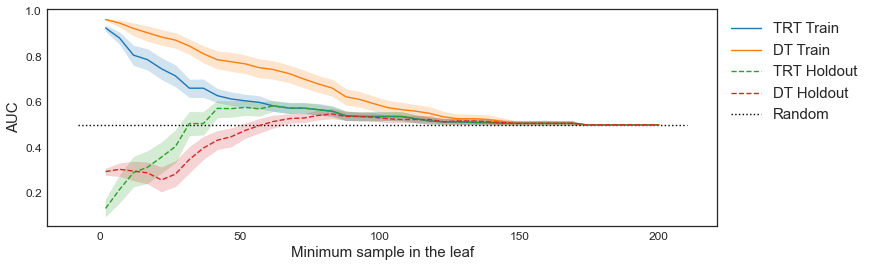

In [43]:
fig, ax = plt.subplots()
sns.lineplot(data=challenger_results, x="splits", y="train", label="TRT Train")
sns.lineplot(data=benchmark_results, x="splits", y="train", label="DT Train")

sns.lineplot(data=challenger_results, x="splits", y="holdout", linestyle="dashed", label="TRT Holdout")
sns.lineplot(data=benchmark_results, x="splits", y="holdout", linestyle="dashed", label="DT Holdout")
plt.legend()

xmin, xmax, ymin, ymax = plt.axis()
plt.hlines(0.5, xmin, xmax, linestyle="dotted", color="black", label="Random")

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC", fontsize=15)
#plt.xlabel("Minimum sample in the leaf (DT), minimum sample by period (TRT)", fontsize=15)
plt.xlabel("Minimum sample in the leaf", fontsize=15)

__file__ = "../images/motivational_deeper_robust"
plt.savefig(__file__+".jpg", quality=95)
for c in ax.findobj(p):
    c.set_zorder(-1)
    c.set_rasterized(True)
ax.set_rasterization_zorder(0)

plt.savefig(__file__+".eps")

plt.savefig("../images/motivational_deeper_robust.eps", format="eps", bbox_inches="tight")

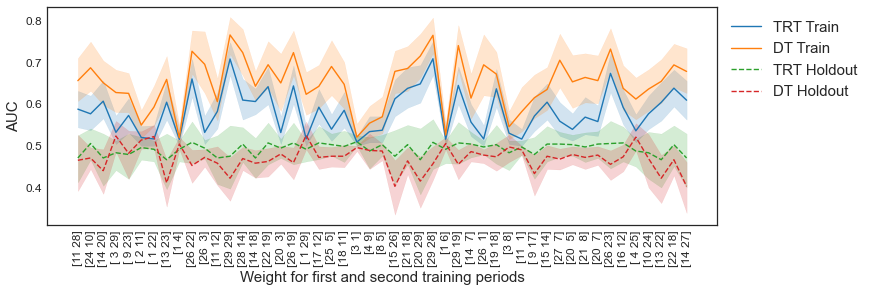

In [44]:
fig, ax = plt.subplots()
sns.lineplot(data=challenger_results, x="weight", y="train", label="TRT Train")
sns.lineplot(data=benchmark_results, x="weight", y="train", label="DT Train")

sns.lineplot(data=challenger_results, x="weight", y="holdout", linestyle="dashed", label="TRT Holdout")
sns.lineplot(data=benchmark_results, x="weight", y="holdout", linestyle="dashed", label="DT Holdout")
plt.legend()

xmin, xmax, ymin, ymax = plt.axis()

ax.xaxis.set_tick_params(labelsize=12, labelrotation=90)
ax.yaxis.set_tick_params(labelsize=12)

plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("AUC", fontsize=15)
#plt.xlabel("Minimum sample in the leaf (DT), minimum sample by period (TRT)", fontsize=15)
plt.xlabel("Weight for first and second training periods", fontsize=15)

__file__ = "../images/motivational_deeper_robust_weight"
plt.savefig(__file__+".jpg", quality=95)
for c in ax.findobj(p):
    c.set_zorder(-1)
    c.set_rasterized(True)
ax.set_rasterization_zorder(0)

plt.savefig(__file__+".eps")

#plt.savefig("../images/motivational_deeper_robust.eps", format="eps", bbox_inches="tight")

<AxesSubplot:xlabel='splits'>

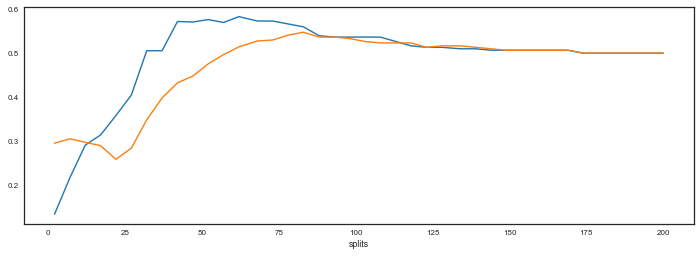

In [45]:
challenger_results.groupby("splits")["holdout"].mean().plot()
benchmark_results.groupby("splits")["holdout"].mean().plot()

<AxesSubplot:xlabel='splits'>

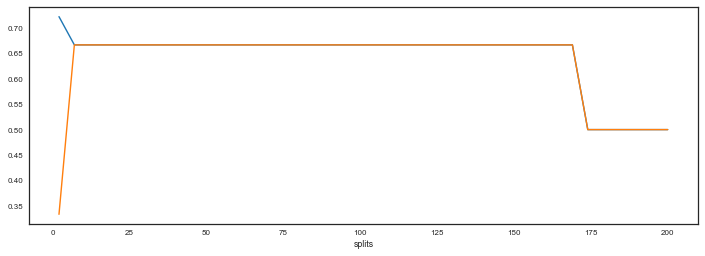

In [46]:
challenger_results.groupby("splits")["holdout"].max().plot()
benchmark_results.groupby("splits")["holdout"].max().plot()

<AxesSubplot:xlabel='weight'>

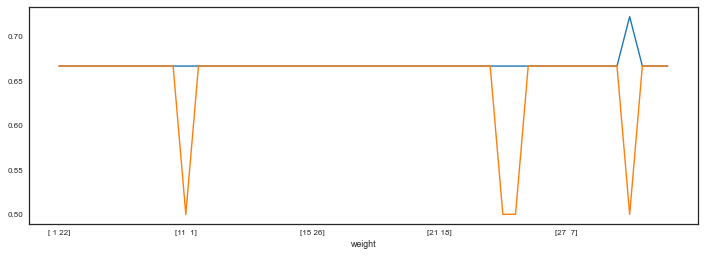

In [47]:
challenger_results.groupby("weight")["holdout"].max().plot()
benchmark_results.groupby("weight")["holdout"].max().plot()

In [48]:
benchmark_results["holdout"].max()

0.6666666666666667

In [49]:
challenger_results["holdout"].max()

0.7222222222222222